# Web scrapping

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
def ipl_scraping(year):
    page=requests.get("https://www.iplt20.com/stats/{}".format(year))
    content=page.content
    soup=BeautifulSoup(content,'html.parser')
    cols = []
    for i in soup.find_all('th'):
        cols.append(i.text)
    cols=cols[1:14]
    td = []
    for i in soup.find_all('td'):
        td.append(i.text)
    name = []
    mat = []
    inns = []
    no=[]
    runs=[]
    hs=[]
    avg=[]
    bf=[]
    sr=[]
    hunderd=[]
    fifty=[]
    fours=[]
    sixes=[]
    season = []

    for val in td[1::14]:
        name.append(val)
        season.append(year)
    for val in td[2::14]:
        mat.append(val)
    for val in td[3::14]:
        inns.append(val)
    for val in td[4::14]:
        no.append(val)
    for val in td[5::14]:
        runs.append(val)
    for val in td[6::14]:
        hs.append(val)
    for val in td[7::14]:
        avg.append(val)
    for val in td[8::14]:
        bf.append(val)
    for val in td[9::14]:
        sr.append(val)
    for val in td[10::14]:
        hunderd.append(val)
    for val in td[11::14]:
        fifty.append(val)
    for val in td[12::14]:
        fours.append(val)
    for val in td[13::14]:
        sixes.append(val)
    d={'Player':name[:129],
      'matches':mat[:129],
      'innings':inns[:129],
      'No':no[:129],
      'Runs':runs[:129],
      'HS':hs[:129],
      'Average':avg[:129],
      'BF':bf[:129],
      'SR':sr[:129],
      '100':hunderd[:129],
      '50':fifty[:129],
      '4':fours[:129],
      '6':sixes[:129],
    'season':season[:129]}
    return pd.DataFrame(d)
    


In [3]:
df_2008 = ipl_scraping(2008)
df_2009 = ipl_scraping(2009)
df_2010 =ipl_scraping(2010)
df_2011 = ipl_scraping(2011)
df_2012 = ipl_scraping(2012)
df_2013 = ipl_scraping(2013)
df_2014 = ipl_scraping(2014)
df_2015 = ipl_scraping(2015)
df_2016 = ipl_scraping(2016)
df_2017 = ipl_scraping(2017)
df_2018 = ipl_scraping(2018)
df_2019 = ipl_scraping(2019)
df_2020 = ipl_scraping(2020)
df_2021 = ipl_scraping(2021)


In [4]:
df_final = pd.concat([df_2008,df_2009,df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2019,df_2020,df_2021])

In [5]:
df_final.to_csv('ipldata_before_cleaning.csv')

In [6]:
df_final = pd.read_csv('ipldata_before_cleaning.csv')

In [7]:
df_final['Player']=df_final['Player'].apply(lambda x:x.replace('\n',''))

In [8]:
df_final

,Unnamed: 0,Player,matches,innings,No,Runs,HS,Average,BF,SR,100,50,4,6,season
0,0,Shaun Marsh,11,11,2,616,115,68.44,441,139.68,1,5,59,26,2008
1,1,Gautam Gambhir,14,14,1,534,86,41.07,379,140.89,0,5,68,8,2008
2,2,Sanath Jayasuriya,14,14,2,518,114*,43.16,309,167.63,1,2,58,31,2008
3,3,Shane Watson,15,15,5,472,76*,47.20,311,151.76,0,4,47,19,2008
4,4,Graeme Smith,11,11,2,441,91,49.00,362,121.82,0,3,54,8,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,124,Tim Southee,3,1,0,3,3,3.00,5,60.00,0,0,0,0,2021
1673,125,Navdeep Saini,2,1,0,2,2,2.00,4,50.00,0,0,0,0,2021
1674,126,Tabraiz Shamsi,1,1,1,2,2*,0.00,4,50.00,0,0,0,0,2021
1675,127,Kartik Tyagi,4,2,1,2,1*,2.00,4,50.00,0,0,0,0,2021


In [9]:
df_final.drop(['Unnamed: 0'],axis=1,inplace=True)
df_final

,Player,matches,innings,No,Runs,HS,Average,BF,SR,100,50,4,6,season
0,Shaun Marsh,11,11,2,616,115,68.44,441,139.68,1,5,59,26,2008
1,Gautam Gambhir,14,14,1,534,86,41.07,379,140.89,0,5,68,8,2008
2,Sanath Jayasuriya,14,14,2,518,114*,43.16,309,167.63,1,2,58,31,2008
3,Shane Watson,15,15,5,472,76*,47.20,311,151.76,0,4,47,19,2008
4,Graeme Smith,11,11,2,441,91,49.00,362,121.82,0,3,54,8,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,Tim Southee,3,1,0,3,3,3.00,5,60.00,0,0,0,0,2021
1673,Navdeep Saini,2,1,0,2,2,2.00,4,50.00,0,0,0,0,2021
1674,Tabraiz Shamsi,1,1,1,2,2*,0.00,4,50.00,0,0,0,0,2021
1675,Kartik Tyagi,4,2,1,2,1*,2.00,4,50.00,0,0,0,0,2021


In [10]:
df_final.index=np.arange(1677)

In [11]:
df_final

,Player,matches,innings,No,Runs,HS,Average,BF,SR,100,50,4,6,season
0,Shaun Marsh,11,11,2,616,115,68.44,441,139.68,1,5,59,26,2008
1,Gautam Gambhir,14,14,1,534,86,41.07,379,140.89,0,5,68,8,2008
2,Sanath Jayasuriya,14,14,2,518,114*,43.16,309,167.63,1,2,58,31,2008
3,Shane Watson,15,15,5,472,76*,47.20,311,151.76,0,4,47,19,2008
4,Graeme Smith,11,11,2,441,91,49.00,362,121.82,0,3,54,8,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,Tim Southee,3,1,0,3,3,3.00,5,60.00,0,0,0,0,2021
1673,Navdeep Saini,2,1,0,2,2,2.00,4,50.00,0,0,0,0,2021
1674,Tabraiz Shamsi,1,1,1,2,2*,0.00,4,50.00,0,0,0,0,2021
1675,Kartik Tyagi,4,2,1,2,1*,2.00,4,50.00,0,0,0,0,2021


# Data Cleaning

In [12]:
df_final['HS']=df_final['HS'].apply(lambda x:x.replace('*',''))
df_final

,Player,matches,innings,No,Runs,HS,Average,BF,SR,100,50,4,6,season
0,Shaun Marsh,11,11,2,616,115,68.44,441,139.68,1,5,59,26,2008
1,Gautam Gambhir,14,14,1,534,86,41.07,379,140.89,0,5,68,8,2008
2,Sanath Jayasuriya,14,14,2,518,114,43.16,309,167.63,1,2,58,31,2008
3,Shane Watson,15,15,5,472,76,47.20,311,151.76,0,4,47,19,2008
4,Graeme Smith,11,11,2,441,91,49.00,362,121.82,0,3,54,8,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,Tim Southee,3,1,0,3,3,3.00,5,60.00,0,0,0,0,2021
1673,Navdeep Saini,2,1,0,2,2,2.00,4,50.00,0,0,0,0,2021
1674,Tabraiz Shamsi,1,1,1,2,2,0.00,4,50.00,0,0,0,0,2021
1675,Kartik Tyagi,4,2,1,2,1,2.00,4,50.00,0,0,0,0,2021


In [13]:
df_final.isnull().sum()

Player     0
matches    0
innings    0
No         0
Runs       0
HS         0
Average    0
BF         0
SR         0
100        0
50         0
4          0
6          0
season     0
dtype: int64

In [14]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1677 entries, 0 to 1676
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   1677 non-null   object 
 1   matches  1677 non-null   int64  
 2   innings  1677 non-null   int64  
 3   No       1677 non-null   int64  
 4   Runs     1677 non-null   int64  
 5   HS       1677 non-null   object 
 6   Average  1677 non-null   float64
 7   BF       1677 non-null   int64  
 8   SR       1677 non-null   float64
 9   100      1677 non-null   int64  
 10  50       1677 non-null   int64  
 11  4        1677 non-null   int64  
 12  6        1677 non-null   int64  
 13  season   1677 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 196.5+ KB


In [15]:
df_final.describe()

,matches,innings,No,Runs,Average,BF,SR,100,50,4,6,season
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,9.315444,7.070960,1.609422,140.545617,19.911604,110.067979,116.033393,0.036374,0.714967,12.852117,5.160405,2014.230769
std,4.905317,4.787773,1.617913,155.604422,15.084900,114.917980,37.757277,0.214038,1.290630,15.652882,6.950209,4.061409
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000
25%,5.000000,3.000000,0.000000,18.000000,8.420000,18.000000,98.140000,0.000000,0.000000,1.000000,0.000000,2011.000000
50%,10.000000,6.000000,1.000000,72.000000,18.000000,62.000000,118.260000,0.000000,0.000000,6.000000,2.000000,2014.000000
75%,14.000000,11.000000,2.000000,228.000000,28.440000,175.000000,136.310000,0.000000,1.000000,20.000000,8.000000,2017.000000
max,19.000000,19.000000,10.000000,973.000000,152.000000,640.000000,400.000000,4.000000,9.000000,88.000000,59.000000,2021.000000


In [16]:
df_final.to_csv('ipldata_after_cleaning.csv')

In [17]:
df_final = pd.read_csv('ipldata_after_cleaning.csv')

# Converting data type

In [18]:
df_final['matches'] = df_final['matches'].astype('int64')
df_final['innings']=df_final['innings'].astype('int64')
df_final['No']=df_final['No'].astype('int64')
df_final['Runs']=df_final['Runs'].astype('int64')
df_final['HS']=df_final['HS'].astype('int64')
df_final['Average']=df_final['Average'].astype('float')
df_final['BF']=df_final['BF'].astype('int64')
df_final['SR']=df_final['SR'].astype('float')
df_final['100']=df_final['100'].astype('int64')
df_final['50']=df_final['50'].astype('int64')
df_final['4']=df_final['4'].astype('int64')
df_final['6']=df_final['6'].astype('int64')
df_final['season']=df_final['season'].astype('int64')

In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1677 non-null   int64  
 1   Player      1677 non-null   object 
 2   matches     1677 non-null   int64  
 3   innings     1677 non-null   int64  
 4   No          1677 non-null   int64  
 5   Runs        1677 non-null   int64  
 6   HS          1677 non-null   int64  
 7   Average     1677 non-null   float64
 8   BF          1677 non-null   int64  
 9   SR          1677 non-null   float64
 10  100         1677 non-null   int64  
 11  50          1677 non-null   int64  
 12  4           1677 non-null   int64  
 13  6           1677 non-null   int64  
 14  season      1677 non-null   int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 196.6+ KB


# Data Analysis

- Uni-variate Analysis
- Bi-variate Analysis
- Multi-variate Analysis


# Univariate Analysis for matches:

In [20]:
df_final['matches'].describe()

count    1677.000000
mean        9.315444
std         4.905317
min         1.000000
25%         5.000000
50%        10.000000
75%        14.000000
max        19.000000
Name: matches, dtype: float64

# Players who has played maximum matches

In [21]:
df_final[df_final['matches'] == max(df_final['matches'])]

,Unnamed: 0,Player,matches,innings,No,Runs,HS,Average,BF,SR,100,50,4,6,season
523,523,Suresh Raina,19,18,1,441,73,25.94,325,135.69,0,1,36,19,2012
530,530,Dwayne Bravo,19,16,8,371,48,46.37,264,140.53,0,0,20,20,2012
533,533,MS Dhoni,19,17,5,358,51,29.83,278,128.77,0,1,26,9,2012
564,564,Ravindra Jadeja,19,14,2,191,48,15.91,151,126.49,0,0,13,9,2012
624,624,Ravichandran Ashwin,19,5,2,18,8,6.00,15,120.00,0,0,2,0,2012
650,650,Rohit Sharma,19,19,5,538,79,38.42,409,131.54,0,4,35,28,2013
651,651,Dinesh Karthik,19,19,1,510,86,28.33,411,124.08,0,2,54,14,2013
676,676,Ambati Rayudu,19,17,3,265,37,18.92,231,114.71,0,0,22,4,2013
707,707,Harbhajan Singh,19,14,8,116,25,19.33,79,146.83,0,0,12,5,2013


# Univariate Analysis for innings:

In [22]:
df_final['innings'].describe()

count    1677.000000
mean        7.070960
std         4.787773
min         1.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        19.000000
Name: innings, dtype: float64

# Players who has played maximum innings

In [23]:
df_final[df_final['innings']==max(df_final['innings'])]

,Unnamed: 0,Player,matches,innings,No,Runs,HS,Average,BF,SR,100,50,4,6,season
650,650,Rohit Sharma,19,19,5,538,79,38.42,409,131.54,0,4,35,28,2013
651,651,Dinesh Karthik,19,19,1,510,86,28.33,411,124.08,0,2,54,14,2013


# Univariate Analysis for Not Out:

In [24]:
df_final['No'].describe()

count    1677.000000
mean        1.609422
std         1.617913
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        10.000000
Name: No, dtype: float64

# Players who were maximum no of times not out

In [25]:
df_final[df_final['No']==max(df_final['No'])]

,Unnamed: 0,Player,matches,innings,No,Runs,HS,Average,BF,SR,100,50,4,6,season
789,789,MS Dhoni,16,15,10,371,57,74.2,250,148.4,0,1,22,20,2014


# Univariate Analysis for Runs:

In [26]:
df_final['Runs'].describe()

count    1677.000000
mean      140.545617
std       155.604422
min         0.000000
25%        18.000000
50%        72.000000
75%       228.000000
max       973.000000
Name: Runs, dtype: float64

# Player who has scored highest runs

In [27]:
df_final[df_final['Runs']==max(df_final['Runs'])]

,Unnamed: 0,Player,matches,innings,No,Runs,HS,Average,BF,SR,100,50,4,6,season
1032,1032,Virat Kohli,16,16,4,973,113,81.08,640,152.03,4,7,83,38,2016


# Univariate Analysis for High score:

In [28]:
df_final['HS'].describe()

count    1677.000000
mean       37.703041
std        29.812922
min         0.000000
25%        12.000000
50%        30.000000
75%        60.000000
max       175.000000
Name: HS, dtype: float64

# Player who has scored the highest score

In [29]:
df_final[df_final['HS']==max(df_final['HS'])]

,Unnamed: 0,Player,matches,innings,No,Runs,HS,Average,BF,SR,100,50,4,6,season
646,646,Chris Gayle,16,16,4,708,175,59.0,453,156.29,1,4,57,51,2013


# Univariate Analysis for Average score:

In [30]:
df_final['Average'].describe()

count    1677.000000
mean       19.911604
std        15.084900
min         0.000000
25%         8.420000
50%        18.000000
75%        28.440000
max       152.000000
Name: Average, dtype: float64

# Player whose average score is the highest

In [31]:
df_final[df_final['Average']==max(df_final['Average'])]

,Unnamed: 0,Player,matches,innings,No,Runs,HS,Average,BF,SR,100,50,4,6,season
42,42,Luke Pomersbach,5,5,4,152,79,152.0,99,153.53,0,1,13,9,2008


# Univariate Analysis for Ball faced:

In [32]:
df_final['BF'].describe()

count    1677.000000
mean      110.067979
std       114.917980
min         1.000000
25%        18.000000
50%        62.000000
75%       175.000000
max       640.000000
Name: BF, dtype: float64

# Player who has faced the highest balls

In [33]:
df_final[df_final['BF']==max(df_final['BF'])]

,Unnamed: 0,Player,matches,innings,No,Runs,HS,Average,BF,SR,100,50,4,6,season
1032,1032,Virat Kohli,16,16,4,973,113,81.08,640,152.03,4,7,83,38,2016


# Univariate Analysis for Strike rate:

In [34]:
df_final['SR'].describe()

count    1677.000000
mean      116.033393
std        37.757277
min         0.000000
25%        98.140000
50%       118.260000
75%       136.310000
max       400.000000
Name: SR, dtype: float64

# Player who has the highest strike rate

In [35]:
df_final[df_final['SR']==max(df_final['SR'])]

,Unnamed: 0,Player,matches,innings,No,Runs,HS,Average,BF,SR,100,50,4,6,season
883,883,Abu Nechim,4,1,1,4,4,0.0,1,400.0,0,0,1,0,2014


# Univariate Analysis for 100s:

In [36]:
df_final['100'].describe()

count    1677.000000
mean        0.036374
std         0.214038
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: 100, dtype: float64

# Player who scored the highest 100s

In [37]:
df_final[df_final['100']==max(df_final['100'])]

,Unnamed: 0,Player,matches,innings,No,Runs,HS,Average,BF,SR,100,50,4,6,season
1032,1032,Virat Kohli,16,16,4,973,113,81.08,640,152.03,4,7,83,38,2016


# Univariate Analysis for 50s:

In [38]:
df_final['50'].describe()

count    1677.000000
mean        0.714967
std         1.290630
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         9.000000
Name: 50, dtype: float64

# Player who scored the highest 50s

In [39]:
df_final[df_final['50']==max(df_final['50'])]

,Unnamed: 0,Player,matches,innings,No,Runs,HS,Average,BF,SR,100,50,4,6,season
1033,1033,David Warner,17,17,3,848,93,60.57,560,151.42,0,9,88,31,2016


# Univariate Analysis for fours:

In [40]:
df_final['4'].describe()

count    1677.000000
mean       12.852117
std        15.652882
min         0.000000
25%         1.000000
50%         6.000000
75%        20.000000
max        88.000000
Name: 4, dtype: float64

# Player who has scored the highest 4s

In [41]:
df_final[df_final['4']==max(df_final['4'])]

,Unnamed: 0,Player,matches,innings,No,Runs,HS,Average,BF,SR,100,50,4,6,season
1033,1033,David Warner,17,17,3,848,93,60.57,560,151.42,0,9,88,31,2016


# Univariate Analysis for sixes:

In [42]:
df_final['6'].describe()

count    1677.000000
mean        5.160405
std         6.950209
min         0.000000
25%         0.000000
50%         2.000000
75%         8.000000
max        59.000000
Name: 6, dtype: float64

# Player who has scored the highest 6s

In [43]:
df_final[df_final['6']==max(df_final['6'])]

,Unnamed: 0,Player,matches,innings,No,Runs,HS,Average,BF,SR,100,50,4,6,season
516,516,Chris Gayle,15,14,2,733,128,61.08,456,160.74,1,7,46,59,2012


# Bi-variate Analysis

# Bivariate Analysis for matches:

# Players who have played the highest matches 

In [44]:
df_final.groupby('Player')['matches'].sum().sort_values(ascending = False)[:10]

Player
MS Dhoni           204
Rohit Sharma       199
Virat Kohli        193
Suresh Raina       190
Ravindra Jadeja    184
Dinesh Karthik     182
Shikhar Dhawan     181
Robin Uthappa      177
Kieron Pollard     169
Ambati Rayudu      159
Name: matches, dtype: int64

# Players who have played more than 15 matches in 2008

In [45]:
df_final[(df_final['matches']>15) & (df_final['season']==2008)][['Player']]

,Player
6,Yusuf Pathan
7,Suresh Raina
8,MS Dhoni
28,Subramaniam Badrinath
34,Mohammad Kaif
82,Manpreet Gony


# Bivariate Analysis for innings:

# Players who have played the highest innings

In [46]:
df_final.groupby('Player')['innings'].sum().sort_values(ascending = False)[:10]

Player
Rohit Sharma      194
Virat Kohli       185
Suresh Raina      185
Shikhar Dhawan    179
MS Dhoni          178
Robin Uthappa     170
Dinesh Karthik    163
Kieron Pollard    152
Ambati Rayudu     148
AB de Villiers    146
Name: innings, dtype: int64

# Players who have played minimum 7 innings in season 2010

In [47]:
df_final[(df_final['innings']>7) & (df_final['season']==2010)][['Player']].head(10)

,Player
258,Sachin Tendulkar
259,Jacques Kallis
260,Suresh Raina
261,Sourav Ganguly
262,Murali Vijay
263,Mahela Jayawardena
264,Andrew Symonds
265,Saurabh Tiwary
266,Rohit Sharma
267,Naman Ojha


# Bivariate Analysis for Not out:

# Players who were not out least time

In [48]:
df_final.groupby('Player')['No'].sum().sort_values(ascending = False)[:20]

Player
MS Dhoni           64
Ravindra Jadeja    58
Kieron Pollard     50
Yusuf Pathan       40
Harbhajan Singh    37
AB de Villiers     34
Dwayne Bravo       34
Piyush Chawla      29
Irfan Pathan       29
Ambati Rayudu      29
Virat Kohli        28
Albie Morkel       28
Hardik Pandya      27
Suresh Raina       27
Rohit Sharma       26
Kedar Jadhav       25
David Miller       25
Manoj Tiwary       25
Manish Pandey      25
Dinesh Karthik     24
Name: No, dtype: int64

# Bivariate Analysis for runs:

# Players who have scored the highest runs

In [49]:
df_final.groupby('Player')['Runs'].sum().sort_values(ascending = False)[:10]

Player
Virat Kohli       5753
Shikhar Dhawan    5327
Rohit Sharma      5325
David Warner      5286
Suresh Raina      5083
Chris Gayle       4597
Robin Uthappa     4371
MS Dhoni          4291
AB de Villiers    4217
Gautam Gambhir    3846
Name: Runs, dtype: int64

# Players who have scored more than 150 runs in 2012

In [50]:
df_final[(df_final['Runs']>150) & (df_final['season']==2012)]['Player'].head(10)

516        Chris Gayle
517     Gautam Gambhir
518     Shikhar Dhawan
519     Ajinkya Rahane
520    Virender Sehwag
521      Cameron White
522       Rahul Dravid
523       Suresh Raina
524       Rohit Sharma
525      Mandeep Singh
Name: Player, dtype: object

# Bivariate Analysis for highest score:

# Players who have scored the highest score

In [51]:
df_final.groupby('Player')['HS'].sum().sort_values(ascending = False)[:10]

Player
Chris Gayle       1102
David Warner      1012
Rohit Sharma       995
Shikhar Dhawan     992
Virat Kohli        983
AB de Villiers     935
Suresh Raina       903
Robin Uthappa      864
Manish Pandey      863
Shane Watson       810
Name: HS, dtype: int64

# Players whose highest score is more than 90  in 2014

In [52]:
df_final[(df_final['HS']>90) & (df_final['season']==2014)]['Player'].head(10)

776      Glenn Maxwell
779    Virender Sehwag
783      Manish Pandey
785      Lendl Simmons
790    Wriddhiman Saha
804     Corey Anderson
Name: Player, dtype: object

# Bivariate Analysis for average:

# Players who have the highest average

In [53]:
df_final.groupby('Player')['Average'].sum().sort_values(ascending=False)[:10]

Player
MS Dhoni           526.67
Virat Kohli        474.76
David Warner       464.00
Chris Gayle        459.58
Shikhar Dhawan     439.23
Manish Pandey      431.30
AB de Villiers     428.65
Rohit Sharma       415.09
Suresh Raina       391.45
Ravindra Jadeja    384.72
Name: Average, dtype: float64

# Players whose average is more than 30 in 2016

In [54]:
df_final[(df_final['Average']>30) & (df_final['season']==2016)]['Player'].head(10)

1032        Virat Kohli
1033       David Warner
1034     AB de Villiers
1035     Shikhar Dhawan
1036     Gautam Gambhir
1037       Rohit Sharma
1038     Ajinkya Rahane
1039       Murali Vijay
1040    Quinton de Kock
1042           KL Rahul
Name: Player, dtype: object

# Bivariate Analysis for ball faced:

# Players who have faced the highest balls

In [55]:
df_final.groupby('Player')['BF'].sum().sort_values(ascending = False)[:10]

Player
Virat Kohli       4454
Shikhar Dhawan    4249
Rohit Sharma      4088
David Warner      3761
Suresh Raina      3706
Robin Uthappa     3363
MS Dhoni          3192
Chris Gayle       3081
Gautam Gambhir    3038
Ajinkya Rahane    2935
Name: BF, dtype: int64

# Players who have faced more than 100 balls in 2020

In [56]:
df_final[(df_final['BF']>100) & (df_final['season']==2020) ]['Player'].head(10)

1419            KL Rahul
1420      Shikhar Dhawan
1421        David Warner
1422        Shreyas Iyer
1423        Ishan Kishan
1424     Quinton de Kock
1425    Suryakumar Yadav
1426    Devdutt Padikkal
1427         Virat Kohli
1428      AB de Villiers
Name: Player, dtype: object

# Bivariate Analysis for strike rate:

# Players who have the highest strike rate

In [57]:
df_final.groupby('Player')['SR'].sum().sort_values(ascending = False)[:10]

Player
Dwayne Bravo      1811.43
AB de Villiers    1740.17
MS Dhoni          1726.78
Chris Gayle       1722.47
Robin Uthappa     1692.66
Rohit Sharma      1692.46
Shikhar Dhawan    1677.71
Kieron Pollard    1661.33
Virat Kohli       1643.12
Suresh Raina      1634.47
Name: SR, dtype: float64

# Players whose strike rate is more than 100 in 2011

In [58]:
df_final[(df_final['SR']>100) & (df_final['season']==2011) ]['Player'].head(10)

387         Chris Gayle
388         Virat Kohli
389    Sachin Tendulkar
390         Shaun Marsh
391      Michael Hussey
392       Paul Valthaty
393        Suresh Raina
394        Murali Vijay
395     Virender Sehwag
396      Jacques Kallis
Name: Player, dtype: object

# Bivariate Analysis for 100s:

# Players who have scored the highest 100s

In [59]:
df_final.groupby('Player')['100'].sum().sort_values(ascending = False)[:10]

Player
Virat Kohli       5
Chris Gayle       5
David Warner      4
Sanju Samson      3
AB de Villiers    2
Hashim Amla       2
Shikhar Dhawan    2
Shane Watson      2
Murali Vijay      2
KL Rahul          2
Name: 100, dtype: int64

# Players who have scored one 100 in 2021

In [60]:
df_final[(df_final['100']==1) & (df_final['season']==2021) ]['Player'].head(10)

1548     Ruturaj Gaikwad
1553        Sanju Samson
1558    Devdutt Padikkal
1571         Jos Buttler
Name: Player, dtype: object

# Bivariate Analysis for 50s:

# Players who have scored the highest 50s

In [61]:
df_final.groupby('Player')['50'].sum().sort_values(ascending = False)[:10]

Player
David Warner      49
Shikhar Dhawan    40
Virat Kohli       38
Rohit Sharma      38
Suresh Raina      35
Gautam Gambhir    34
AB de Villiers    31
Chris Gayle       28
Ajinkya Rahane    27
Robin Uthappa     24
Name: 50, dtype: int64

# Players who have scored more than five fifties in 2015

In [62]:
df_final[(df_final['50']>5) & (df_final['season']==2015) ]['Player'].head(10)

903     David Warner
904    Lendl Simmons
Name: Player, dtype: object

# Bivariate Analysis for 4s:

# Player who have scored the highest 4s

In [63]:
df_final.groupby('Player')['4'].sum().sort_values(ascending = False)[:10]

Player
Shikhar Dhawan    598
David Warner      509
Virat Kohli       494
Rohit Sharma      466
Suresh Raina      460
Gautam Gambhir    451
Robin Uthappa     432
Ajinkya Rahane    378
Chris Gayle       375
Parthiv Patel     345
Name: 4, dtype: int64

# Players who have scored more than 50 fours in 2019

In [64]:
df_final[(df_final['4']>50) & (df_final['season']==2019) ]['Player'].head(10)

1290      David Warner
1293    Shikhar Dhawan
1304      Rohit Sharma
Name: Player, dtype: object

# Bivariate Analysis for 6s:

# Players who have scored the highest 6s

In [65]:
df_final.groupby('Player')['6'].sum().sort_values(ascending = False)[:10]

Player
Chris Gayle       330
Rohit Sharma      215
AB de Villiers    209
Kieron Pollard    207
David Warner      196
Virat Kohli       192
Suresh Raina      191
MS Dhoni          189
Shane Watson      155
Yusuf Pathan      147
Name: 6, dtype: int64

# Players who have scored more than 20 sixes in 2017

In [66]:
df_final[(df_final['6']>20) & (df_final['season']==2017) ]['Player'].head(10)

1161      David Warner
1170     Robin Uthappa
1172    Kieron Pollard
1174      Rishabh Pant
1182     Glenn Maxwell
Name: Player, dtype: object

# Multi-variate Analysis

# Players who have scored maximum runs and remain not out most number of times

In [67]:
df_final.pivot_table(values=['Runs','No'],index=['Player'],aggfunc='sum').sort_values(by = ['Runs'],ascending = False)[:10]

,No,Runs
Player,,
Virat Kohli,28,5753
Shikhar Dhawan,22,5327
Rohit Sharma,26,5325
David Warner,19,5286
Suresh Raina,27,5083
Chris Gayle,14,4597
Robin Uthappa,17,4371
MS Dhoni,64,4291
AB de Villiers,34,4217


# Players with the highest runs and strike rate

In [68]:
df_final.pivot_table(values=['Runs','SR'],index=['Player'],aggfunc='mean').sort_values(by = 'Runs',ascending = False)[:10]

,Runs,SR
Player,,
David Warner,480.545455,139.350909
Virat Kohli,442.538462,126.393846
Devdutt Padikkal,442.000000,125.050000
Gautam Gambhir,427.333333,125.726667
Suresh Raina,423.583333,136.205833
Ruturaj Gaikwad,419.500000,128.485000
Rohit Sharma,409.615385,130.189231
Shubman Gill,404.666667,120.406667
Sachin Tendulkar,389.000000,118.496667


# Players with the highest runs and average

In [69]:
df_final.pivot_table(values=['Runs','Average'],index=['Player'],aggfunc='mean').sort_values(by = 'Runs',ascending = False)[:10]

,Average,Runs
Player,,
David Warner,42.181818,480.545455
Virat Kohli,36.520000,442.538462
Devdutt Padikkal,31.570000,442.000000
Gautam Gambhir,33.156667,427.333333
Suresh Raina,32.620833,423.583333
Ruturaj Gaikwad,48.175000,419.500000
Rohit Sharma,31.930000,409.615385
Shubman Gill,31.610000,404.666667
Sachin Tendulkar,34.333333,389.000000


# Top 10 Players with their 100s and 50s

In [70]:
df_final.groupby(['Player'])['100','50'].sum().sort_values(by = ['100','50'],ascending = False)[:10]

C:\Users\Kushal Adhyaru\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,100,50
Player,,
Virat Kohli,5,38
Chris Gayle,5,28
David Warner,4,49
Sanju Samson,3,12
Shikhar Dhawan,2,40
AB de Villiers,2,31
Ajinkya Rahane,2,27
KL Rahul,2,21
Shane Watson,2,19


# Top 10 Players who have scored highest 4s and 6s

In [71]:
df_final.groupby(['Player'])['4','6'].sum().sort_values(by = ['4','6'],ascending = False)[:10]

C:\Users\Kushal Adhyaru\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,4,6
Player,,
Shikhar Dhawan,598,110
David Warner,509,196
Virat Kohli,494,192
Rohit Sharma,466,215
Suresh Raina,460,191
Gautam Gambhir,451,56
Robin Uthappa,432,147
Ajinkya Rahane,378,71
Chris Gayle,375,330


# Data Visualization

# Univariate analysis


- Numerical variable 
    - Histogram
    - Distplot
    - Kdeplot
    - Boxplot



# Data Visualization of runs using Histogram

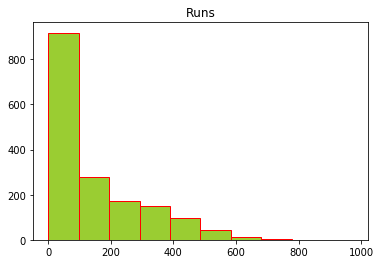

In [72]:
plt.hist(x=df_final['Runs'],bins=10,color='yellowgreen',edgecolor='red')
plt.title('Runs')
plt.show()

# Observation: Maximum runs are more than 800 and minimum run is zero

# Data Visualization of High score uaing Dist plot

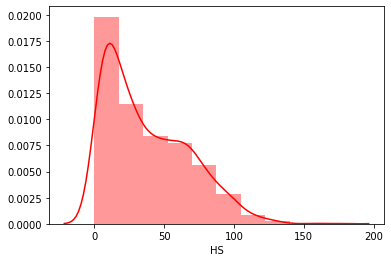

In [73]:
sns.distplot(df_final['HS'],bins=10,color='red')
plt.show()

# Observation:Highest score is nearly 200 and lowest score is 0

# Data Visualization of Average using Kde plot

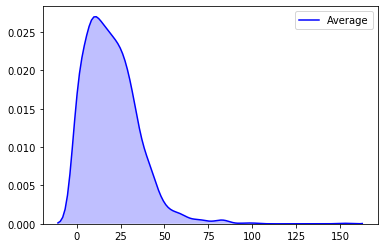

In [74]:
sns.kdeplot(df_final['Average'], shade = True , color = "Blue")
plt.show()

# Observation:Minimum average is 0 and maximum average is more than 150

# Data Visualization of Strike rate using Boxplot

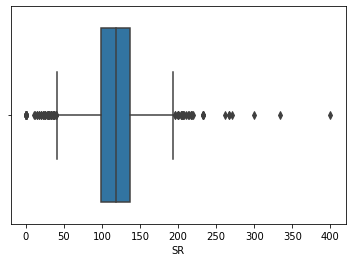

In [75]:
sns.boxplot(df_final['SR'])
plt.show()

# Observation:Minimum strike rate is 0,maximum strike rate is 400 & mean strike rate is between 100 & 150

# - Categorical variables
    - Pieplot
    - Countplot

# Data Visualization of Player who has scored the highest score using pie chart

In [76]:
x=df_final.groupby('Player')['HS'].sum().sort_values(ascending = False)[:5]
x

Player
Chris Gayle       1102
David Warner      1012
Rohit Sharma       995
Shikhar Dhawan     992
Virat Kohli        983
Name: HS, dtype: int64

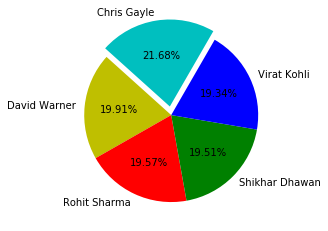

In [77]:
x=df_final.groupby('Player')['HS'].sum().sort_values(ascending = False)[:5]
C = ['c','y','r','g','b']
l=['Chris Gayle','David Warner','Rohit Sharma','Shikhar Dhawan','Virat Kohli']
e= [0.1, 0.0, 0.0, 0.0, 0.0]
plt.pie(x,colors=C,labels=l,startangle=60,explode=e,autopct='%.2f%%')
plt.show()

# Observation:Top five players who has scored maximum runs are Chris Gayle,David Warner,Rohit Sharma,Shikhar Dhawan,Virat Kohli

# Data Visualization of 50s using Count plot


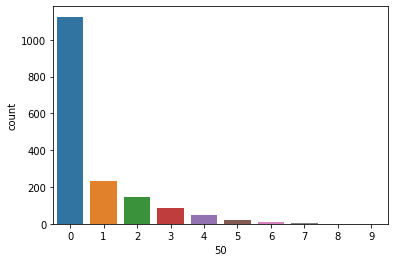

In [78]:
sns.countplot(df_final['50'])
plt.show()

In [79]:
df_final['50'].describe()

count    1677.000000
mean        0.714967
std         1.290630
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         9.000000
Name: 50, dtype: float64

# Observation:Players who have scored zero 50s are more than 1000 and maximum 50s are 9

# Bivariate Analysis
- Numerical Variable and Numerical variables
    - Scatterplot
    - Regplot
    - Relplot
    - Jointplot

# data visualization of players with their runs and average using scatterplot

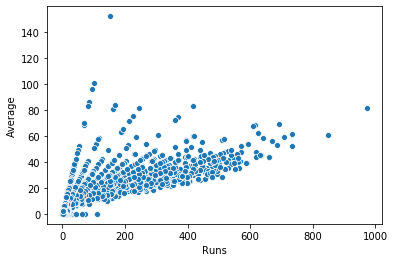

In [80]:
sns.scatterplot(data=df_final,x='Runs',y='Average')
plt.show()

# Observation:When runs are increasing, average is also increasing.

# data visualization of players with their runs and strike rate using regression plot

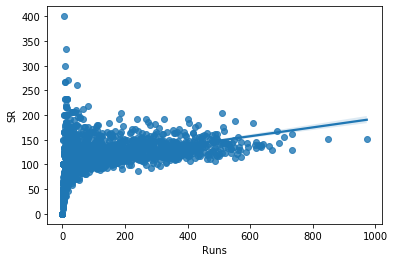

In [81]:
sns.regplot(data=df_final,x='Runs',y='SR')
plt.show()

# Observation:When runs are increasing,strike rate is also increasing.

# Data visualization of players with their high score and not out using relation plot

In [82]:
df_final.groupby('No')['HS'].sum()

No
0     15922
1     16866
2     13089
3      7767
4      4558
5      2989
6      1112
7       495
8       276
9        97
10       57
Name: HS, dtype: int64

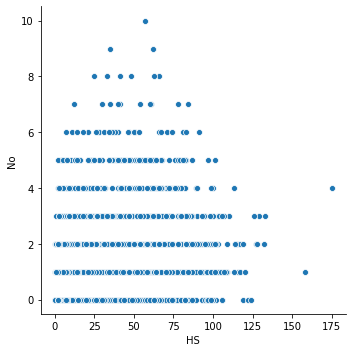

In [83]:
sns.relplot(data=df_final,x='HS',y='No')
plt.show()

# Observation:Players who have scored their highest score and remain not out is very less

# Data Visualization of players with their 100s and 4s using join plot using jointplot

In [84]:
df_final.groupby('100')['4'].sum()

100
0    19122
1     2184
2      164
4       83
Name: 4, dtype: int64

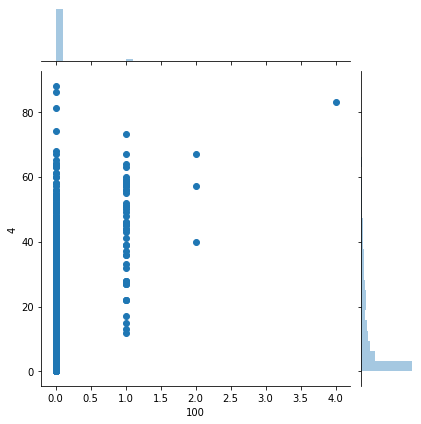

In [85]:
sns.jointplot(data=df_final,x='100',y='4')
plt.show()

# Observation:Only one player has scored 4 centuries & that player has scored more than 80 fours

 Numerical and Categorical Variable
    - Barplot
    - Boxplot
    - Violinplot
    - Lineplot

# Data visualization of players with their 100s using barplot

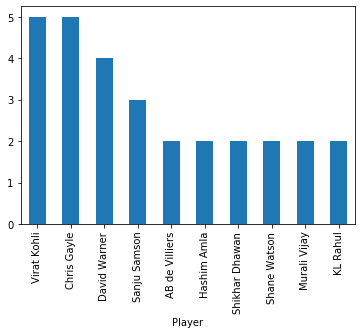

In [86]:
df_final.groupby('Player')['100'].sum().sort_values(ascending = False)[:10].plot(kind='bar')

# Observation:Virat Kohli and Chris Gayle has scored the highest 5 times centuries

# Data visualization of players with their average when they were not out using box plot

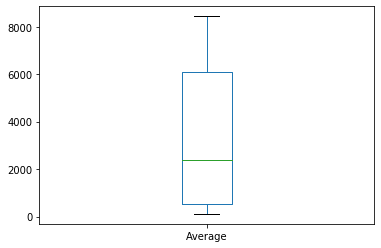

In [87]:
df_final.groupby(['No'])['Average'].sum().sort_values(ascending = False)[:10].plot(kind = 'box')

# Data visualization of players with their strike rate when they scored 100 using violine plot

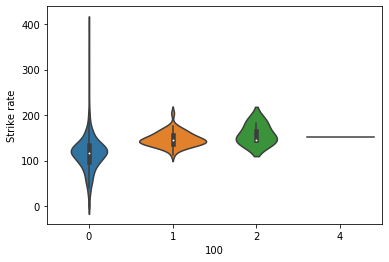

In [88]:
sns.violinplot(data=df_final,x='100',y='SR')
plt.xlabel('100')
plt.ylabel('Strike rate')
plt.show()

# Data visualization of players with their 50s using line plot

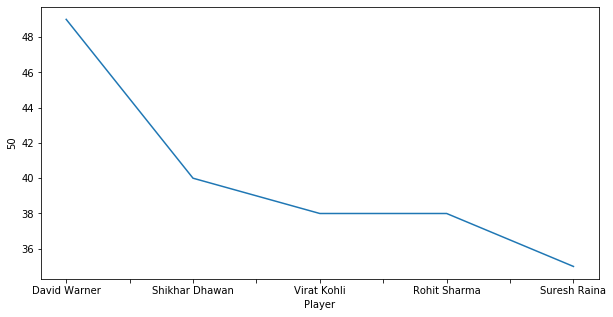

In [89]:
df_final.groupby(['Player'])['50'].sum().sort_values(ascending = False)[:5].plot(kind = 'line',figsize=(10, 5))
plt.xlabel('Player')
plt.ylabel('50')
plt.show()

# Observation:David warner has scored the highest 50's between season 2008 to 2021

# Data visualization of innings,Runs and Hightest score using bar plot

In [90]:
df_final.columns

Index(['Unnamed: 0', 'Player', 'matches', 'innings', 'No', 'Runs', 'HS',
       'Average', 'BF', 'SR', '100', '50', '4', '6', 'season'],
      dtype='object')

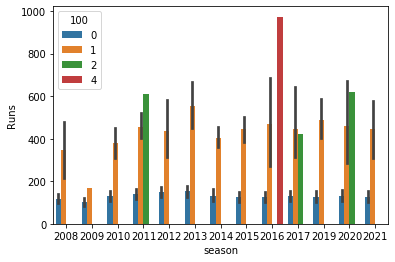

In [91]:
sns.barplot(df_final['season'], df_final['Runs'],hue = df_final['100'])

# Observation:In season 2016 ,player has scored the highest 4 times 100 with nearly 1000 runs .


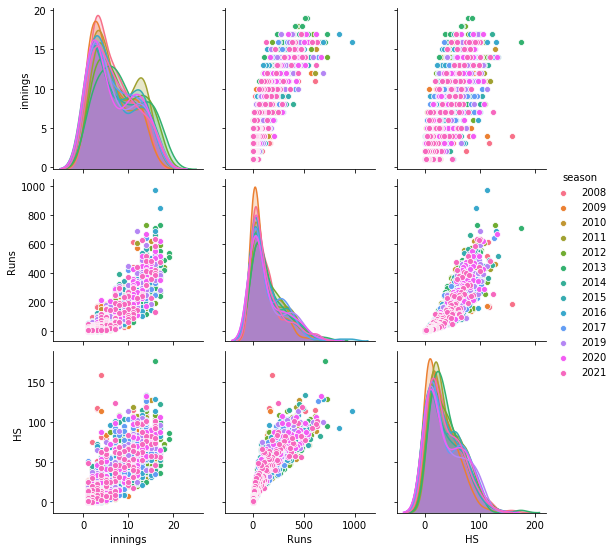

In [92]:
sns.pairplot(data=df_final[['innings','Runs','HS','season']],hue='season')
plt.show()